### Webscrape Stock Data

In [27]:
%run ../../../_config/base/base.ipynb

In [28]:
%run ../../../_util/core/core.ipynb

## Webscrape



====== WebDriver manager ======
Current google-chrome version is 106.0.5249
Get LATEST driver version for 106.0.5249
Driver [C:\Users\joshu\.wdm\drivers\chromedriver\win32\106.0.5249.61\chromedriver.exe] found in cache
C:\Users\joshu\AppData\Local\Temp\ipykernel_7116\1603934282.py:1: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  driver = webdriver.Chrome(ChromeDriverManager().install())


<g-img class="QyR1Ze ZGomKf" style="margin-right:8px"></g-img>
<g-img class="QyR1Ze ZGomKf" style="margin-right:8px"></g-img>
<g-img class="QyR1Ze ZGomKf" style="margin-right:8px"></g-img>
<g-img class="QyR1Ze ZGomKf" style="margin-right:8px"></g-img>
<g-img class="QyR1Ze ZGomKf" style="margin-right:8px"></g-img>
<g-img class="QyR1Ze ZGomKf" style="margin-right:8px"></g-img>
12
6
6
<html itemscope="" itemtype="http://schema.org/SearchResultsPage" lang="en-CA"><head><meta charset="utf-8"/><meta content="origin" name="referrer"/><meta content="/images/branding/googleg/1x/googleg_standard_color_128dp.png" itemprop="image"/><title>AAPL - Google Search</title><script async="" nonce="3XeQFO_P6KGgSQf4VR3qfw" src="https://apis.google.com/_/scs/abc-static/_/js/k=gapi.gapi.en.IK5OmUURd2E.O/m=gapi_iframes,googleapis_client/rt=j/sv=1/d=1/ed=1/rs=AHpOoo932JinkSJHK92WgVjIV-Jwwyu3Rw/cb=gapi.loaded_0"></script><script nonce="3XeQFO_P6KGgSQf4VR3qfw">(function(){window.google={kEI:'DzRXY_LSBZOHptQPjYOVk
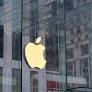
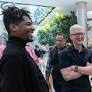
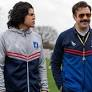
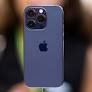
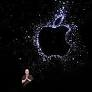
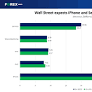
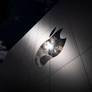
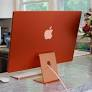
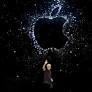
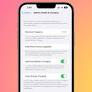
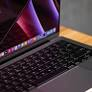
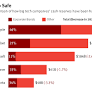
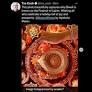
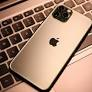
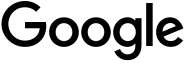
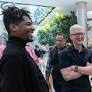
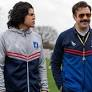
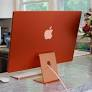
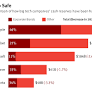
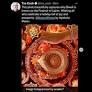

In [40]:
driver = webdriver.Chrome(ChromeDriverManager().install())

for val in LIST_OF_TECH_STOCKS:
    counter = 0
    headline_data = []
    datetime_extract_data = []
    article_published_data = []
    publisher = []
    link = newsLink(val)
    driver.get(link)
    content = driver.page_source
    soup = BeautifulSoup(content)
    headlines = soup.find_all(class_="mCBkyc tNxQIb y355M ynAwRc nDgy9d")
    headlines_date = soup.find_all(class_="OSrXXb ZE0LJd YsWzw")
    headlines_publisher = soup.find_all(class_="QyR1Ze ZGomKf")
    for val in headlines:
        headlineDate = headlines_date[counter].get_text().strip()
        headlinePublisher = headlines_publisher[counter].get_text().strip()
        print(headlines_publisher[counter])
        strVal = val.get_text().strip()
        headline_data.append(strVal)
        datetime_extract_data.append(CURR_TIME) # change currtime
        article_published_data.append(headlineDate)
        publisher.append(headlinePublisher)
        counter += 1
    
    print(len(headlineDate))
    print(len(datetime_extract_data))
    print(len(article_published_data))
    d = {'Datetime': datetime_extract_data, 
         'Headline Data': headline_data,
         'Article Published Date': article_published_data,
         'Article Publisher': publisher
        }
    df_extract = pd.DataFrame(d)
    df_extract.head()
    print(soup)
    break

In [34]:
df_extract.head()

,Datetime,Headline Data,Article Published Date,Article Publisher
0,2022-10-24,Apple reports earnings Thursday and all eyes a...,9 hours ago,
1,2022-10-24,Apple raises prices of TV and music streaming ...,6 hours ago,
2,2022-10-24,Apple raises prices of its services as media e...,6 hours ago,
3,2022-10-24,Apple earnings: What do the iPhone production ...,3 days ago,
4,2022-10-24,"Apple expected to beat earnings forecasts, set...",1 day ago,


### Move Data to Data Folder